In [13]:
import pandas as pd
import numpy as np

# EDA
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

from scipy.stats import pointbiserialr

In [14]:
data=pd.read_csv('sssss/cardio_train.csv')
data.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [16]:
data['age_years'] = data['age'].apply(lambda x: x/365)
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50.391781
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55.419178
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51.663014
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48.282192
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47.873973


In [17]:
data.isnull()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
69996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
69997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
69998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [18]:
data.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
age_years      0
dtype: int64

In [19]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,70000.0,49972.419900,28851.302323,0.000000,25006.750000,50001.500000,74889.250000,99999.000000
age,70000.0,19468.865814,2467.251667,10798.000000,17664.000000,19703.000000,21327.000000,23713.000000
gender,70000.0,1.349571,0.476838,1.000000,1.000000,1.000000,2.000000,2.000000
height,70000.0,164.359229,8.210126,55.000000,159.000000,165.000000,170.000000,250.000000
weight,70000.0,74.205690,14.395757,10.000000,65.000000,72.000000,82.000000,200.000000
ap_hi,70000.0,128.817286,154.011419,-150.000000,120.000000,120.000000,140.000000,16020.000000
ap_lo,70000.0,96.630414,188.472530,-70.000000,80.000000,80.000000,90.000000,11000.000000
cholesterol,70000.0,1.366871,0.680250,1.000000,1.000000,1.000000,2.000000,3.000000
gluc,70000.0,1.226457,0.572270,1.000000,1.000000,1.000000,1.000000,3.000000
smoke,70000.0,0.088129,0.283484,0.000000,0.000000,0.000000,0.000000,1.000000


In [20]:
# # sets plot size
# plt.figure(figsize=(8,6))

# # plots scatterplot
# sns.scatterplot(x='height', y='weight', data=data, hue='age', palette='rainbow', size='age', alpha=0.75)
# plt.xlabel("Height (cm)")
# plt.ylabel("Weight (kg)")
# plt.title("Weight x Height", fontsize=14)

# # displays the plot
# plt.show()

In [21]:
# scatter matrix to visualize data
# pd.plotting.scatter_matrix(data, figsize = [15,15]);

In [22]:
data.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
age_years      0
dtype: int64

In [23]:
data.duplicated().sum()

0

In [24]:
# drop id column
data.drop('id', axis= 1, inplace= True)

# change gender from 1 or 2 to 0 or 1
data['gender'].replace(2, 0, inplace= True)

C:\Users\sathi\AppData\Local\Temp\ipykernel_3628\1761837787.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['gender'].replace(2, 0, inplace= True)


In [25]:
data['age'] = round(data['age'] / 365, 1)
data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
0,50.4,0,168,62.0,110,80,1,1,0,0,1,0,50.391781
1,55.4,1,156,85.0,140,90,3,1,0,0,1,1,55.419178
2,51.7,1,165,64.0,130,70,3,1,0,0,0,1,51.663014
3,48.3,0,169,82.0,150,100,1,1,0,0,1,1,48.282192
4,47.9,1,156,56.0,100,60,1,1,0,0,0,0,47.873973


In [26]:
print(data.age.min())
data.age.max()

29.6


65.0

Our data contains adults from ages 29 - 65 years old.

Some of the heights seemed suspicious so we will check them out.

In [27]:
# check heights 
data[data['height'] < 125]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
224,59.7,0,76,55.0,120,80,1,1,0,0,1,0,59.726027
3420,39.8,1,100,70.0,100,70,1,1,0,0,1,0,39.769863
3735,48.3,1,120,70.0,120,70,1,1,0,0,1,0,48.334247
3752,42.2,1,120,30.0,110,70,1,1,0,0,1,0,42.191781
4212,44.1,1,120,80.0,120,80,1,1,0,0,1,0,44.136986
...,...,...,...,...,...,...,...,...,...,...,...,...,...
65302,50.6,1,99,60.0,90,60,1,1,0,0,1,0,50.594521
66023,40.0,1,120,80.0,120,70,2,1,0,0,1,0,39.986301
66479,46.4,0,110,90.0,110,90,1,1,0,0,1,0,46.378082
66643,51.6,1,57,61.0,130,90,1,1,0,0,1,1,51.589041


In [28]:
# 125cm (4') seems short for the weights that are associated with them
# so drop 
data = data[data['height'] >= 125]

In [29]:
data[data['height'] > 200]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
6486,58.1,1,250,86.0,140,100,3,1,0,0,1,1,58.136986
21628,52.2,0,207,78.0,100,70,1,1,0,1,1,0,52.202740


In [30]:
# a height of 250cm (8'2") and a weight of 86kg (190lbs) seems suspicious
data.drop(index=6486, inplace= True)

In [31]:
# find where ap_lo is higher than ap_hi
data = data[data['ap_hi'] > data['ap_lo']]

In [32]:
# remove ap_hi and ap_lo with negative and extremely low numbers
# anything with systolic < 80 and diastolic < 50 is considered abnormally low
data = data[data['ap_hi'] > 80]
data = data[data['ap_lo'] > 50]

In [33]:
# remove any ap_hi an ap_lo readings that are abnormally high
data = data[data['ap_hi'] < 250]

In [34]:
# while these diastolic readings are very high, 
# they are still lower than the systolic and match other features
data[data['ap_lo'] > 150]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
4781,51.9,1,158,74.0,200,170,1,1,0,0,1,1,51.947945
4981,62.3,0,173,74.0,220,160,2,2,0,0,1,1,62.252055
38022,59.6,1,161,84.0,196,182,2,2,0,0,1,1,59.643836
43998,62.1,0,163,70.0,200,180,1,1,0,0,0,1,62.060274
54987,53.4,1,169,80.0,200,160,3,3,0,0,1,0,53.400000


In [35]:
#40kg = 88lbs, this would indicate a underweight person, or a typo in the data
data = data[data['weight'] >= 40]

In [36]:
data.reset_index(inplace= True, drop= True)

In [37]:
# change feature names
new_names = {'ap_hi' : 'systolic', 
             'ap_lo' : 'diastolic', 
             'gluc' : 'glucose', 
             'alco': 'alcohol', 
             'cardio': 'disease'
            }

In [38]:
data = data.rename(columns= new_names)

In [39]:
data.shape

(68413, 13)

In [40]:
data.head()

,age,gender,height,weight,systolic,diastolic,cholesterol,glucose,smoke,alcohol,active,disease,age_years
0,50.4,0,168,62.0,110,80,1,1,0,0,1,0,50.391781
1,55.4,1,156,85.0,140,90,3,1,0,0,1,1,55.419178
2,51.7,1,165,64.0,130,70,3,1,0,0,0,1,51.663014
3,48.3,0,169,82.0,150,100,1,1,0,0,1,1,48.282192
4,47.9,1,156,56.0,100,60,1,1,0,0,0,0,47.873973


In [41]:
data.drop(columns=['age_years'])

,age,gender,height,weight,systolic,diastolic,cholesterol,glucose,smoke,alcohol,active,disease
0,50.4,0,168,62.0,110,80,1,1,0,0,1,0
1,55.4,1,156,85.0,140,90,3,1,0,0,1,1
2,51.7,1,165,64.0,130,70,3,1,0,0,0,1
3,48.3,0,169,82.0,150,100,1,1,0,0,1,1
4,47.9,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
68408,52.7,0,168,76.0,120,80,1,1,1,0,1,0
68409,61.9,1,158,126.0,140,90,2,2,0,0,1,1
68410,52.2,0,183,105.0,180,90,3,1,0,1,0,1
68411,61.5,1,163,72.0,135,80,1,2,0,0,0,1


In [42]:
data.disease.value_counts(normalize= True)

disease
0    0.504729
1    0.495271
Name: proportion, dtype: float64

In [43]:
# Data cleaning removed 1,488 data points from our original 70,000 and we still have even number of patients without and with cardiovascular disease (CVD).

In [44]:
data_eda = data.copy()

In [45]:
# sns.scatterplot(x= 'height', y= 'weight', hue= 'disease', data= data_eda)

Looking at height and weight in this manner isn't very helpful.

In [46]:
# create BMI feature
def BMI (data):
    return round(data['weight'] / (data['height'] / 100) **2, 2)

data_eda['BMI'] = data_eda.apply(BMI, axis= 1)

In [47]:
data_eda.describe().T

,count,mean,std,min,25%,50%,75%,max
age,68413.0,53.333130,6.759749,29.600000,48.400000,54.000000,58.400000,65.000000
gender,68413.0,0.650973,0.476666,0.000000,0.000000,1.000000,1.000000,1.000000
height,68413.0,164.450835,7.842102,125.000000,159.000000,165.000000,170.000000,207.000000
weight,68413.0,74.153387,14.259347,40.000000,65.000000,72.000000,82.000000,200.000000
systolic,68413.0,126.744961,16.620734,85.000000,120.000000,120.000000,140.000000,240.000000
diastolic,68413.0,81.366188,9.376343,52.000000,80.000000,80.000000,90.000000,182.000000
cholesterol,68413.0,1.364931,0.679155,1.000000,1.000000,1.000000,2.000000,3.000000
glucose,68413.0,1.225864,0.571804,1.000000,1.000000,1.000000,1.000000,3.000000
smoke,68413.0,0.087966,0.283247,0.000000,0.000000,0.000000,0.000000,1.000000
alcohol,68413.0,0.053396,0.224824,0.000000,0.000000,0.000000,0.000000,1.000000


In [48]:
# pal = ['#008ae6' , '#ec1313']

# plt.figure(figsize= (10,15))
# sns.boxplot(x = 'disease', y= 'BMI', data= data_eda, palette= pal)
# plt.title('Body Mass Index and Cardiovascular Disease', fontsize= 20)
# plt.xlabel('Disease Presence')
# plt.ylabel('BMI')



# A quick boxplot shows that individuals with CVD have, on average, higher body mass indexes than those that do not have CVD.

In [49]:
#function to categorize blood pressure
def bp_categories(systolic, diastolic):
    if systolic > 180 or diastolic > 120:
        return 'Crisis'
    elif (140 <= systolic < 180) or (90 <= diastolic < 120):
        return 'HBP_stage2'
    elif (130 <= systolic < 140) or (80 <= diastolic < 90) :
        return 'HBP_stage1'
    elif (120 <= systolic < 130) and diastolic < 80:
        return 'Elevated'
    else:
        return 'Normal'

In [50]:
# HTN is abbreviation for hypertension
data_eda['HTN_stage'] = data_eda[['systolic', 'diastolic']].apply\
(lambda x: bp_categories(*x), axis= 1)

In [51]:
data_eda.HTN_stage.value_counts()

HTN_stage
HBP_stage1    32429
HBP_stage2    23120
Normal         9471
Elevated       3097
Crisis          296
Name: count, dtype: int64

In [52]:
# pal = ['#008ae6' , '#ec1313']

# plt.figure(figsize= (15,15))
# sns.countplot(x= 'HTN_stage', hue= 'disease', data= data_eda, palette= pal)
# plt.title('Blood Pressure Categories and Presence of Cardiovascular Disease', 
#           fontweight= 'bold', fontsize= 20)
# plt.xlabel('Blood Pressure Category')
# plt.legend( ['No disease', 'Disease present'])
# plt.ylabel('# of Patients')

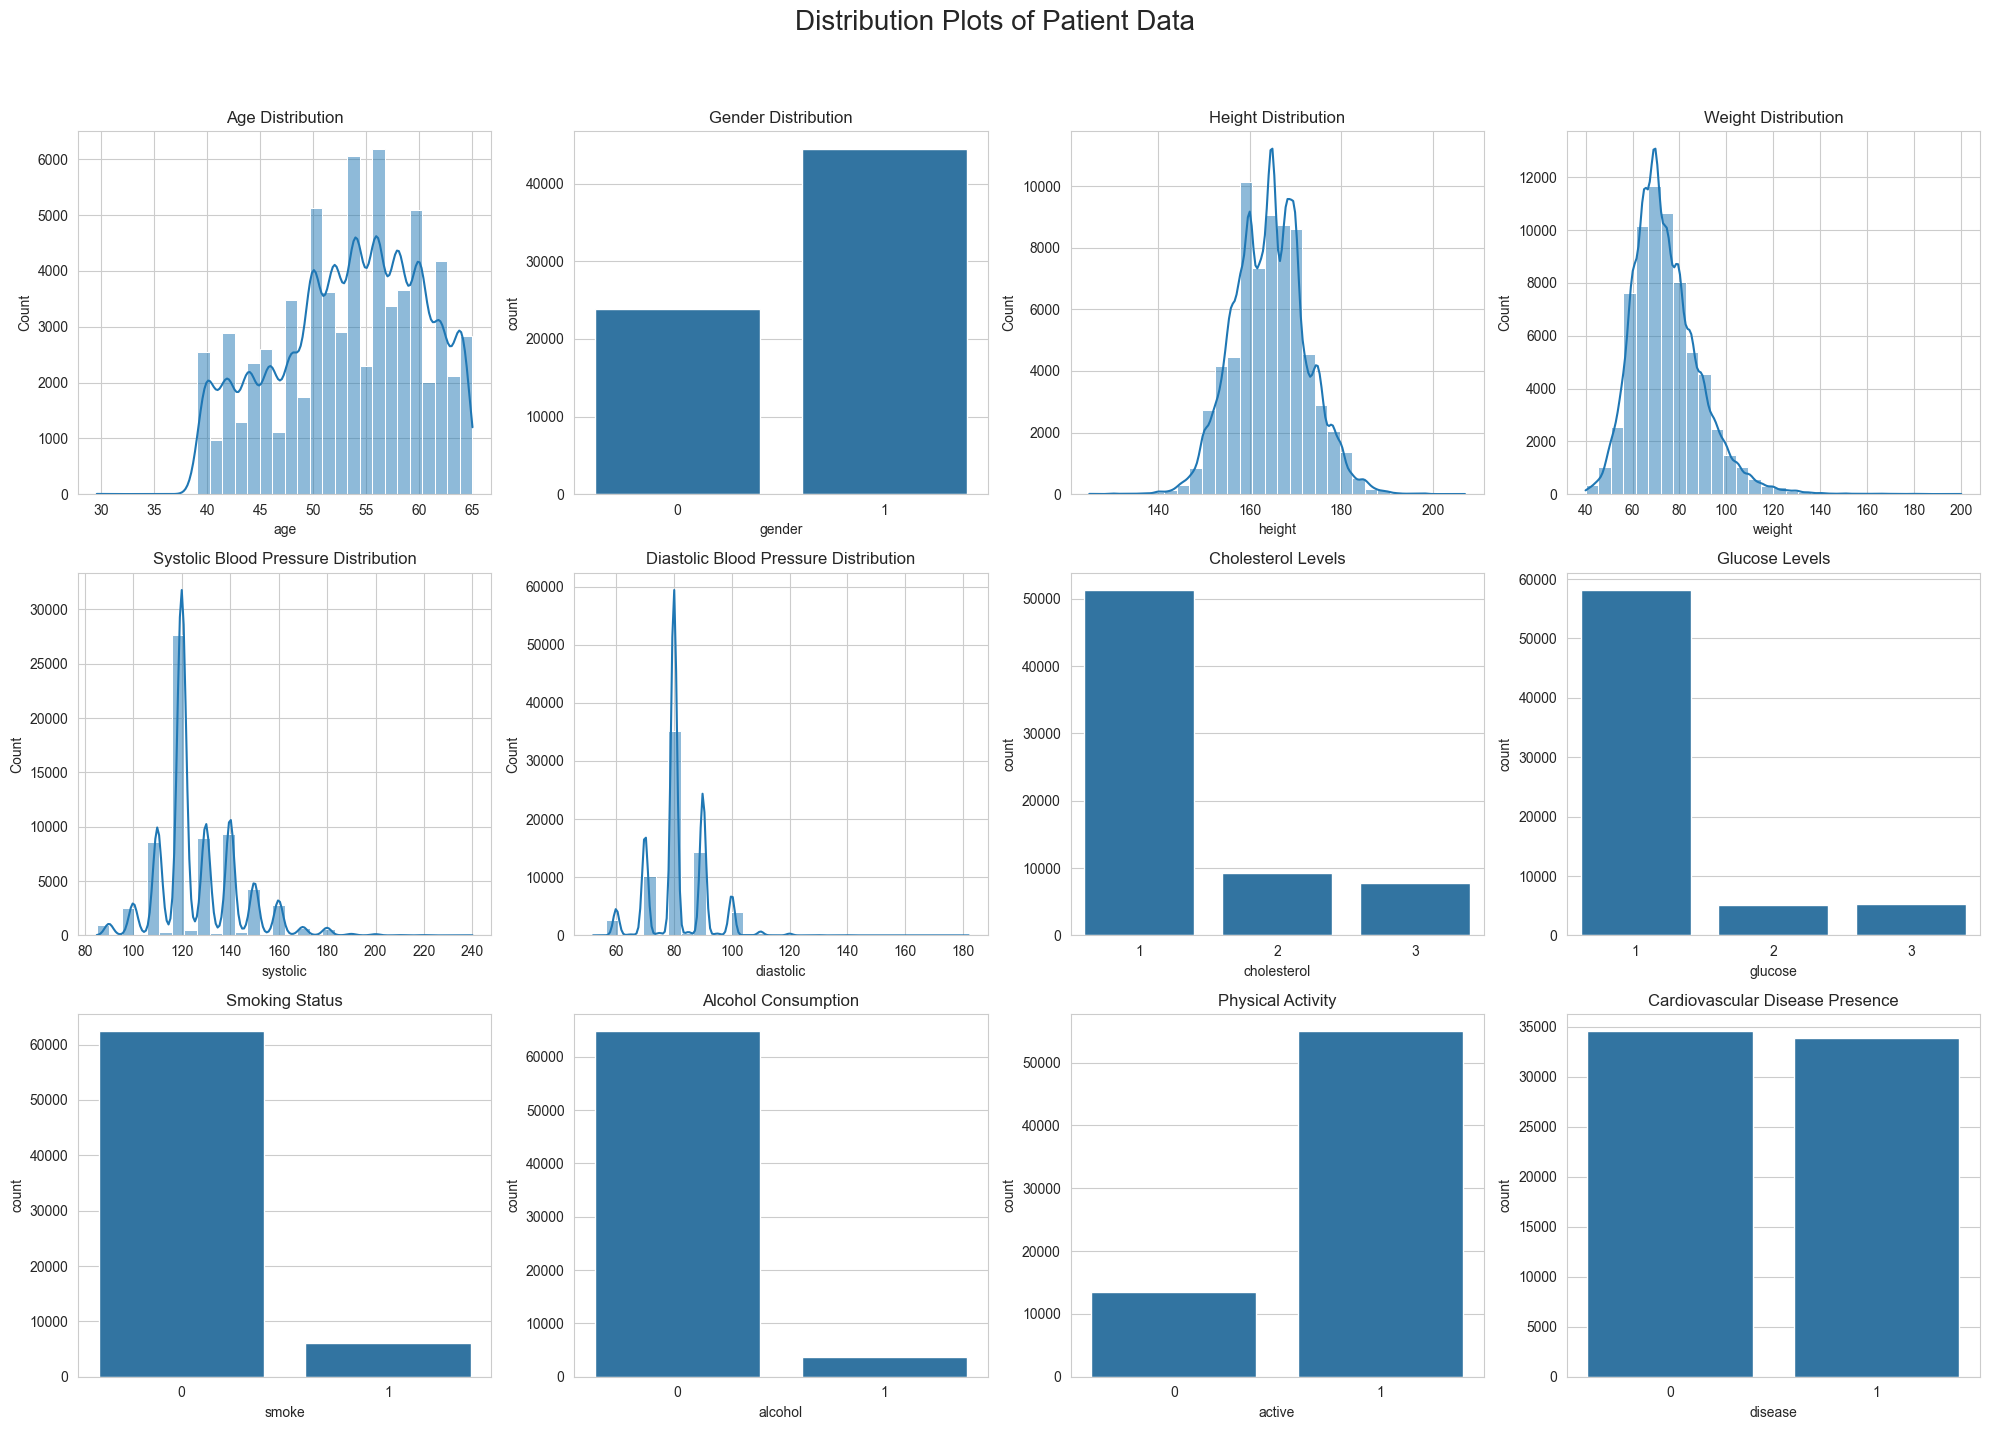

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# data=pd.read_csv('sssss/cardio_train.csv')


df = pd.DataFrame(data_eda)

# Function to plot distribution plots
def plot_distributions(df):
    fig, axs = plt.subplots(3, 4, figsize=(20, 15))
    fig.suptitle('Distribution Plots of Patient Data', fontsize=20)

    sns.histplot(df['age'], bins=30, kde=True, ax=axs[0, 0])
    axs[0, 0].set_title('Age Distribution')

    sns.countplot(x='gender', data=df, ax=axs[0, 1])
    axs[0, 1].set_title('Gender Distribution')

    sns.histplot(df['height'], bins=30, kde=True, ax=axs[0, 2])
    axs[0, 2].set_title('Height Distribution')

    sns.histplot(df['weight'], bins=30, kde=True, ax=axs[0, 3])
    axs[0, 3].set_title('Weight Distribution')

    sns.histplot(df['systolic'], bins=30, kde=True, ax=axs[1, 0])
    axs[1, 0].set_title('Systolic Blood Pressure Distribution')

    sns.histplot(df['diastolic'], bins=30, kde=True, ax=axs[1, 1])
    axs[1, 1].set_title('Diastolic Blood Pressure Distribution')

    sns.countplot(x='cholesterol', data=df, ax=axs[1, 2])
    axs[1, 2].set_title('Cholesterol Levels')

    sns.countplot(x='glucose', data=df, ax=axs[1, 3])
    axs[1, 3].set_title('Glucose Levels')

    sns.countplot(x='smoke', data=df, ax=axs[2, 0])
    axs[2, 0].set_title('Smoking Status')

    sns.countplot(x='alcohol', data=df, ax=axs[2, 1])
    axs[2, 1].set_title('Alcohol Consumption')

    sns.countplot(x='active', data=df, ax=axs[2, 2])
    axs[2, 2].set_title('Physical Activity')

    sns.countplot(x='disease', data=df, ax=axs[2, 3])
    axs[2, 3].set_title('Cardiovascular Disease Presence')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

plot_distributions(df)


age analysiss

In [54]:
print(data_eda.age.min())
print(data_eda.age.max())
data_eda[data_eda['age'] < 30]

29.6
65.0


,age,gender,height,weight,systolic,diastolic,cholesterol,glucose,smoke,alcohol,active,disease,age_years,BMI,HTN_stage
6072,29.8,1,175,59.0,120,80,1,1,0,0,1,0,29.802740,19.27,HBP_stage1
21837,29.6,0,175,92.0,100,60,1,1,0,0,1,0,29.583562,30.04,Normal
29970,29.8,1,159,59.0,120,80,1,1,0,0,1,0,29.750685,23.34,HBP_stage1


In [55]:
# bin ages into categories
data_eda.loc[(data_eda['age'] < 40), 'age_range'] = 30
data_eda.loc[(data_eda['age'] >= 40) & (data_eda['age'] < 50), 'age_range'] = 40
data_eda.loc[(data_eda['age'] >= 50) & (data_eda['age'] < 60), 'age_range'] = 50
data_eda.loc[(data_eda['age'] >= 60) & (data_eda['age'] < 70), 'age_range'] = 60


In [56]:
data_eda.age_range.value_counts(normalize= True)

age_range
50.0    0.507082
40.0    0.278427
60.0    0.191528
30.0    0.022963
Name: proportion, dtype: float64

Text(0, 0.5, 'Patients')

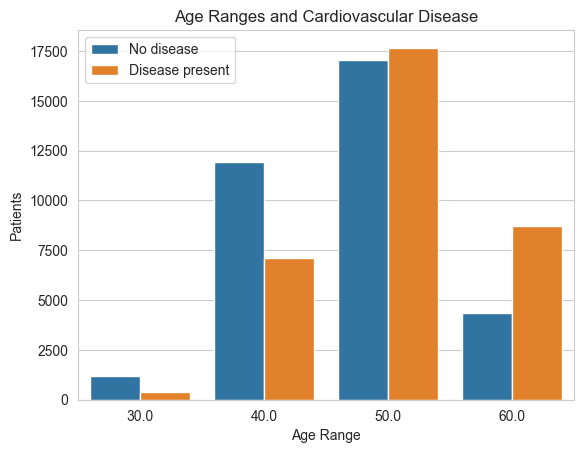

In [57]:
sns.countplot(x= 'age_range', hue= 'disease', data= data_eda)
plt.title('Age Ranges and Cardiovascular Disease')
plt.xlabel('Age Range')
plt.legend( ['No disease', 'Disease present'])
plt.ylabel('Patients')

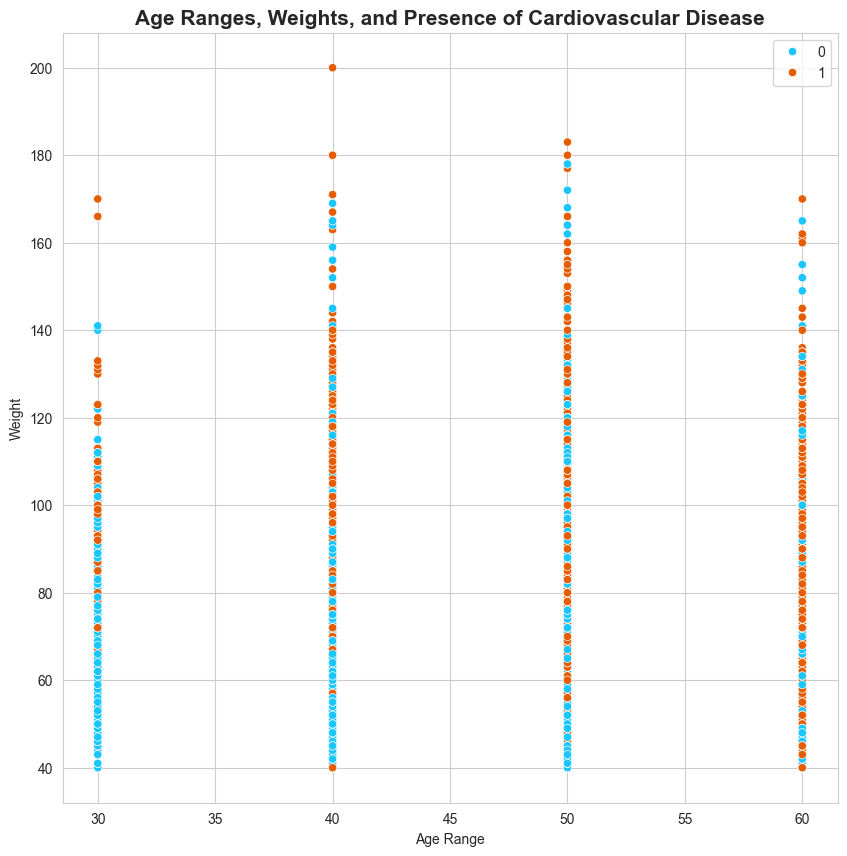

In [58]:
plt.figure(figsize= (10,10))
pal = ['#1ac6ff', '#e65c00']

sns.scatterplot(x= 'age_range', y= 'weight', hue= 'disease', data= data_eda, palette= pal)
plt.title('Age Ranges, Weights, and Presence of Cardiovascular Disease', 
          fontweight= 'bold', fontsize= 15)
plt.xlabel('Age Range')
plt.ylabel('Weight')
plt.legend()

In [59]:
# which is male/female
data_eda.groupby('gender')['height'].mean()

gender
0    170.030279
1    161.459347
Name: height, dtype: float64

In [60]:
data_eda.groupby('gender')['weight'].mean()

gender
0    77.191369
1    72.524535
Name: weight, dtype: float64

In [61]:
data_eda.gender.value_counts(normalize= True)

gender
1    0.650973
0    0.349027
Name: proportion, dtype: float64

In [62]:
# legend_labels = ['male', 'female']

# plt.figure(figsize= (10, 8))
# plt.title('Counts of Males and Females With & Without CV Disease', fontsize= 20)
# sns.countplot(x= 'gender', hue= 'disease', data= data_eda, palette= 'cubehelix')
# plt.xlabel('Absence/Presence of Cardiovascular Disease')
# plt.legend(legend_labels)
# plt.ylabel('Patients')

In [63]:
data_eda.groupby('gender')['disease'].mean()

gender
0    0.499832
1    0.492826
Name: disease, dtype: float64

In [64]:
data_eda.cholesterol.value_counts(normalize= True)

cholesterol
1    0.749814
2    0.135442
3    0.114744
Name: proportion, dtype: float64

In [65]:
# plt.figure(figsize= (8,6))
# sns.countplot(x= 'cholesterol', hue= 'disease', data= data_eda)
# plt.legend( ['No disease', 'Disease present'])
# plt.title('Cholesterol and Disease')
# plt.xlabel('Cholesterol Rank')
# plt.ylabel('# of Patients')

In [66]:
# pal = ['#1a75ff', '#cc6699', '#ff9900']
# sns.catplot(x= 'cholesterol', y= 'disease', data= data_eda, kind= 'bar', 
#             palette= pal)
# plt.title('Average Risk of Having Disease vs Rank of Cholesterol')
# plt.xlabel('Cholesterol Rank')
# plt.ylabel('Has Disease')

76% of patients with cholesterol "well above normal" also have cardiovascular disease

In [67]:
data_eda.groupby('cholesterol')['disease'].mean()

cholesterol
1    0.435971
2    0.597237
3    0.762420
Name: disease, dtype: float64

In [68]:
data_eda.active.value_counts(normalize= True)

active
1    0.803458
0    0.196542
Name: proportion, dtype: float64

In [69]:
# plt.figure(figsize= (12, 10))
# sns.catplot(x='active', y='BMI', col='disease', data=data_eda, kind='boxen', palette='Set1')

In [70]:
data_eda.groupby(['disease', 'active'])['BMI'].mean()

disease  active
0        0         26.521442
         1         26.460297
1        0         28.540764
         1         28.436058
Name: BMI, dtype: float64

In [71]:
# pal = ['#008ae6' , '#ec1313']
# sns.countplot(x= 'glucose', hue= 'disease', data= data_eda, palette= pal)
# plt.legend( ['No disease', 'Disease present'])

In [72]:
data_eda.groupby('glucose')['disease'].mean()

glucose
1    0.476171
2    0.589378
3    0.617528
Name: disease, dtype: float64

In [73]:
data_eda.groupby(['alcohol', 'smoke'])['disease'].mean()

alcohol  smoke
0        0        0.497266
         1        0.481851
1        0        0.514054
         1        0.440377
Name: disease, dtype: float64

In [74]:
data_eda.groupby(['alcohol', 'smoke'])['disease'].count()

alcohol  smoke
0        0        60545
         1         4215
1        0         1850
         1         1803
Name: disease, dtype: int64

In [75]:
# fig= plt.figure(figsize= (6,6))
# al_smo = data_eda.groupby(['alcohol', 'smoke'])['disease'].mean().plot()

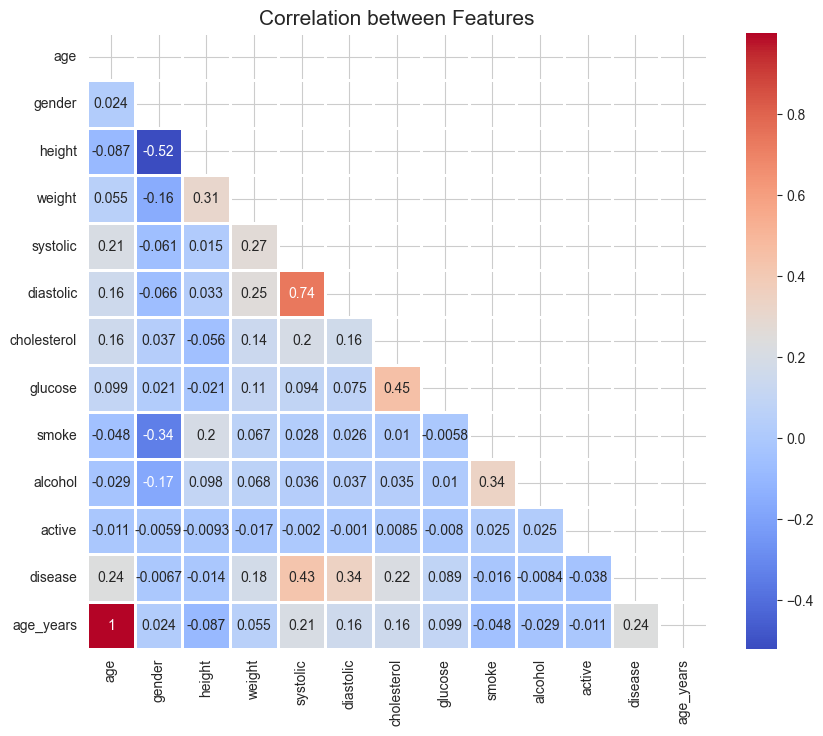

In [76]:
corr = data.corr()

plt.figure(figsize= (10,8))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(data.corr(), cmap= 'coolwarm', mask= mask, linewidths= 1, annot= True)
plt.title('Correlation between Features', fontsize= 15)
plt.show()

In [77]:
data_eda



,age,gender,height,weight,systolic,diastolic,cholesterol,glucose,smoke,alcohol,active,disease,age_years,BMI,HTN_stage,age_range
0,50.4,0,168,62.0,110,80,1,1,0,0,1,0,50.391781,21.97,HBP_stage1,50.0
1,55.4,1,156,85.0,140,90,3,1,0,0,1,1,55.419178,34.93,HBP_stage2,50.0
2,51.7,1,165,64.0,130,70,3,1,0,0,0,1,51.663014,23.51,HBP_stage1,50.0
3,48.3,0,169,82.0,150,100,1,1,0,0,1,1,48.282192,28.71,HBP_stage2,40.0
4,47.9,1,156,56.0,100,60,1,1,0,0,0,0,47.873973,23.01,Normal,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68408,52.7,0,168,76.0,120,80,1,1,1,0,1,0,52.712329,26.93,HBP_stage1,50.0
68409,61.9,1,158,126.0,140,90,2,2,0,0,1,1,61.920548,50.47,HBP_stage2,60.0
68410,52.2,0,183,105.0,180,90,3,1,0,1,0,1,52.235616,31.35,HBP_stage2,50.0
68411,61.5,1,163,72.0,135,80,1,2,0,0,0,1,61.454795,27.10,HBP_stage1,60.0


In [78]:
for c in data_eda.columns:
    n = data_eda[c].nunique()
    print(c)
    if n <= 3:
        print(n, sorted(data_eda[c].value_counts().to_dict().items()))
    else:
        print(n)
    print(10 * '-')

age
262
----------
gender
2 [(0, 23878), (1, 44535)]
----------
height
71
----------
weight
262
----------
systolic
105
----------
diastolic
78
----------
cholesterol
3 [(1, 51297), (2, 9266), (3, 7850)]
----------
glucose
3 [(1, 58164), (2, 5046), (3, 5203)]
----------
smoke
2 [(0, 62395), (1, 6018)]
----------
alcohol
2 [(0, 64760), (1, 3653)]
----------
active
2 [(0, 13446), (1, 54967)]
----------
disease
2 [(0, 34530), (1, 33883)]
----------
age_years
8061
----------
BMI
2267
----------
HTN_stage
5
----------
age_range
4
----------


In [79]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


In [80]:
from sklearn.impute import SimpleImputer


X = data.drop('disease', axis=1)     
y = data['disease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [81]:
y = data['disease']


In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier


models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(),
    'AdaBoost': AdaBoostClassifier(), 
    'Naive Bayes': GaussianNB(),       
    'MLP Neural Network': MLPClassifier() 
}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.2f}")
    print(classification_report(y_test, y_pred))

Training Logistic Regression...
Logistic Regression Accuracy: 0.72
              precision    recall  f1-score   support

           0       0.70      0.79      0.74      6900
           1       0.75      0.66      0.70      6783

    accuracy                           0.72     13683
   macro avg       0.73      0.72      0.72     13683
weighted avg       0.73      0.72      0.72     13683

Training Decision Tree...
Decision Tree Accuracy: 0.63
              precision    recall  f1-score   support

           0       0.64      0.64      0.64      6900
           1       0.63      0.63      0.63      6783

    accuracy                           0.63     13683
   macro avg       0.63      0.63      0.63     13683
weighted avg       0.63      0.63      0.63     13683

Training Random Forest...
Random Forest Accuracy: 0.72
              precision    recall  f1-score   support

           0       0.71      0.74      0.72      6900
           1       0.72      0.69      0.71      6783

    a

C:\Users\sathi\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Accuracy: 0.73
              precision    recall  f1-score   support

           0       0.70      0.81      0.75      6900
           1       0.77      0.65      0.70      6783

    accuracy                           0.73     13683
   macro avg       0.73      0.73      0.73     13683
weighted avg       0.73      0.73      0.73     13683

Training Naive Bayes...
Naive Bayes Accuracy: 0.71
              precision    recall  f1-score   support

           0       0.68      0.80      0.73      6900
           1       0.75      0.61      0.67      6783

    accuracy                           0.71     13683
   macro avg       0.71      0.71      0.70     13683
weighted avg       0.71      0.71      0.70     13683

Training MLP Neural Network...
MLP Neural Network Accuracy: 0.73
              precision    recall  f1-score   support

           0       0.72      0.78      0.75      6900
           1       0.75      0.68      0.72      6783

    accuracy                           0.7

In [88]:

# List of models to train
models = {
    'Logistic Regression': LogisticRegression(max_iter=2000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True),
    'KNN': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'AdaBoost': AdaBoostClassifier(),
    'Naive Bayes': GaussianNB(),
    'MLP Neural Network': MLPClassifier(max_iter=2000)
}

# List to store the results
results_list = []

# Train, predict and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(x_train, y_train)
    # Predict on the test set
    y_pred = model.predict(x_test)
    y_proba = model.predict_proba(x_test)[:, 1] if hasattr(model, 'predict_proba') else None
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None
    
    # Append the results to the list
    results_list.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Recall': recall,
        'ROC AUC': roc_auc
    })

# Convert the list to a DataFrame
results = pd.DataFrame(results_list)

# Display the results
print(results)


In [83]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import joblib
from sklearn.metrics import accuracy_score, mean_squared_error, precision_score, recall_score, f1_score, roc_auc_score



data = pd.read_csv('data/data_eda.csv')

X = data.drop(['disease'], axis=1) 
Y = data['disease']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

model = LogisticRegression(max_iter=2000)
model.fit(x_train, y_train)


training_prediction = model.predict(x_train)
training_score = accuracy_score(y_train, training_prediction)
print("Accuracy on training data:", training_score)

test_prediction = model.predict(x_test)
test_prediction_score = accuracy_score(y_test, test_prediction)
print("Prediction score on test data:", test_prediction_score)



training_prediction = model.predict(x_train)
training_accuracy = accuracy_score(y_train, training_prediction)
training_mse = mean_squared_error(y_train, training_prediction)
training_precision = precision_score(y_train, training_prediction)
training_recall = recall_score(y_train, training_prediction)
training_f1 = f1_score(y_train, training_prediction)
training_roc_auc = roc_auc_score(y_train, model.predict_proba(x_train)[:, 1])

print("Training Accuracy:", training_accuracy)
print("Training Mean Squared Error:", training_mse)
print("Training Precision:", training_precision)
print("Training Recall:", training_recall)
print("Training F1 Score:", training_f1)
print("Training ROC-AUC Score:", training_roc_auc)

# Evaluate the model on testing data
test_prediction = model.predict(x_test)
test_accuracy = accuracy_score(y_test, test_prediction)
test_mse = mean_squared_error(y_test, test_prediction)
test_precision = precision_score(y_test, test_prediction)
test_recall = recall_score(y_test, test_prediction)
test_f1 = f1_score(y_test, test_prediction)
test_roc_auc = roc_auc_score(y_test, model.predict_proba(x_test)[:, 1])

print("Test Accuracy:", test_accuracy)
print("Test Mean Squared Error:", test_mse)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)
print("Test F1 Score:", test_f1)
print("Test ROC-AUC Score:", test_roc_auc)



data = pd.read_csv('data/data_eda.csv')
print(data.columns)

Accuracy on training data: 0.7291247944454595
Prediction score on test data: 0.7203098735657385
Training Accuracy: 0.7291247944454595
Training Mean Squared Error: 0.2708752055545405
Training Precision: 0.755375337908089
Training Recall: 0.6700730465579576
Training F1 Score: 0.7101718441477195
Training ROC-AUC Score: 0.7930387296099539
Test Accuracy: 0.7203098735657385
Test Mean Squared Error: 0.2796901264342615
Test Precision: 0.74740020127474
Test Recall: 0.6575180758447691
Test F1 Score: 0.69958395478452
Test ROC-AUC Score: 0.7844582348919474
Index(['age', 'gender', 'height', 'weight', 'systolic', 'diastolic',
       'cholesterol', 'glucose', 'smoke', 'alcohol', 'active', 'disease'],
      dtype='object')


In [84]:


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, mean_squared_error
import joblib

data = pd.read_csv('data/data_eda.csv')

X = data.drop(['disease'], axis=1)  # contains 11 features
Y = data['disease']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

model = GradientBoostingClassifier()

# Train the model
model.fit(x_train, y_train)

joblib.dump(model, 'model/gradient_boosting_model.pkl')

train_predictions = model.predict(x_train)
train_accuracy = accuracy_score(y_train, train_predictions)
train_f1 = f1_score(y_train, train_predictions, average='weighted')
train_mse = mean_squared_error(y_train, train_predictions)

test_predictions = model.predict(x_test)
test_accuracy = accuracy_score(y_test, test_predictions)
test_f1 = f1_score(y_test, test_predictions, average='weighted')
test_mse = mean_squared_error(y_test, test_predictions)

print("Training Accuracy:", train_accuracy)
print("Training F1 Score:", train_f1)
print("Training MSE:", train_mse)
print("Test Accuracy:", test_accuracy)
print("Test F1 Score:", test_f1)
print("Test MSE:", test_mse)

print()


training_score = accuracy_score(y_train, train_predictions)
print("Accuracy on training data:", training_score)

test_prediction_score = accuracy_score(y_test, test_predictions)
print("Prediction score on test data:", test_prediction_score)


Training Accuracy: 0.7390462269322127
Training F1 Score: 0.7386748440815879
Training MSE: 0.26095377306778733
Test Accuracy: 0.7287144632025141
Test F1 Score: 0.7282071994628792
Test MSE: 0.2712855367974859

Accuracy on training data: 0.7390462269322127
Prediction score on test data: 0.7287144632025141


In [85]:

if len(set(y_train)) > 1:
    train_roc_auc = roc_auc_score(label_binarize(y_train, classes=model.classes_), label_binarize(train_predictions, classes=model.classes_), average='weighted', multi_class='ovr')
else:
    train_roc_auc = None

# Predict on test data
test_predictions = model.predict(x_test)
test_accuracy = accuracy_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions, average='weighted')
test_recall = recall_score(y_test, test_predictions, average='weighted')

# Check for multiple classes in y_test
if len(set(y_test)) > 1:
    test_roc_auc = roc_auc_score(label_binarize(y_test, classes=model.classes_), label_binarize(test_predictions, classes=model.classes_), average='weighted', multi_class='ovr')
else:
    test_roc_auc = None

print("Training Accuracy:", train_accuracy)
print("Training Precision:", train_precision)
print("Training Recall:", train_recall)
print("Training AUC-ROC:", train_roc_auc if train_roc_auc is not None else "Not applicable")

print("Test Accuracy:", test_accuracy)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)
print("Test AUC-ROC:", test_roc_auc if test_roc_auc is not None else "Not applicable")


Training Accuracy: 0.7390462269322127
Training Precision: 0.7399445338260606
Training Recall: 0.7390462269322127
Training AUC-ROC: 0.7387080817574764
Test Accuracy: 0.7287144632025141
Test Precision: 0.7298978606391612
Test Recall: 0.7287144632025141
Test AUC-ROC: 0.7283251394460771


In [86]:


if len(set(y_train)) > 1:
    train_roc_auc = roc_auc_score(label_binarize(y_train, classes=model.classes_), label_binarize(train_predictions, classes=model.classes_), average='weighted', multi_class='ovr')
else:
    train_roc_auc = "Not applicable"

# Predict on test data
test_predictions = model.predict(x_test)
test_accuracy = accuracy_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions, average='weighted')
test_recall = recall_score(y_test, test_predictions, average='weighted')

# Check for multiple classes in y_test
if len(set(y_test)) > 1:
    test_roc_auc = roc_auc_score(label_binarize(y_test, classes=model.classes_), label_binarize(test_predictions, classes=model.classes_), average='weighted', multi_class='ovr')
else:
    test_roc_auc = "Not applicable"

# Create DataFrame for results
results = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'AUC-ROC'],
    'Training': [train_accuracy, train_precision, train_recall, train_roc_auc],
    'Test': [test_accuracy, test_precision, test_recall, test_roc_auc]
})

# Add algorithm name as a column
results.insert(0, 'Algorithm', 'Gradient Boosting Classifier')

# Display the results
print(results)


                      Algorithm     Metric  Training      Test
0  Gradient Boosting Classifier   Accuracy  0.739046  0.728714
1  Gradient Boosting Classifier  Precision  0.739945  0.729898
2  Gradient Boosting Classifier     Recall  0.739046  0.728714
3  Gradient Boosting Classifier    AUC-ROC  0.738708  0.728325


In [87]:


# Check for multiple classes in y_train
if len(set(y_train)) > 1:
    train_roc_auc = roc_auc_score(label_binarize(y_train, classes=model.classes_), label_binarize(train_predictions, classes=model.classes_), average='weighted', multi_class='ovr')
else:
    train_roc_auc = "Not applicable"

# Predict on test data
test_predictions = model.predict(x_test)
test_accuracy = accuracy_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions, average='weighted')
test_recall = recall_score(y_test, test_predictions, average='weighted')
test_f1 = f1_score(y_test, test_predictions, average='weighted')
test_mse = mean_squared_error(y_test, test_predictions)

# Check for multiple classes in y_test
if len(set(y_test)) > 1:
    test_roc_auc = roc_auc_score(label_binarize(y_test, classes=model.classes_), label_binarize(test_predictions, classes=model.classes_), average='weighted', multi_class='ovr')
else:
    test_roc_auc = "Not applicable"

# Create DataFrame for results
results = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC-ROC', 'MSE'],
    'Training': [train_accuracy, train_precision, train_recall, train_f1, train_roc_auc, train_mse],
    'Test': [test_accuracy, test_precision, test_recall, test_f1, test_roc_auc, test_mse]
})

# Add algorithm name as a column
results.insert(0, 'Algorithm', 'Gradient Boosting Classifier')

# Display the results
print(results)


                      Algorithm     Metric  Training      Test
0  Gradient Boosting Classifier   Accuracy  0.739046  0.728714
1  Gradient Boosting Classifier  Precision  0.739945  0.729898
2  Gradient Boosting Classifier     Recall  0.739046  0.728714
3  Gradient Boosting Classifier   F1 Score  0.738675  0.728207
4  Gradient Boosting Classifier    AUC-ROC  0.738708  0.728325
5  Gradient Boosting Classifier        MSE  0.260954  0.271286
